# Place the your data file in the same folder as this notebook and run the cells to use pyFish on your data
> ### Note : Make sure your data file is save in the right format as follows:
    -- Must not have nore than 3 columns
    -- Must be either a csv or txt file
    -- If your data file is a csv type, be the delimiter is a `,' (comma), if not you change the delimiter accordingly in `Load data` section
    -- (preferable) named as `data.csv`, if not be sure to change it in `Load data` section.
#### Note: Its recommended to install pyFish in different (python/anaconda) environment, see installation guide for more help.

# Install pyddsde

In [2]:
!pip install git+https://github.com/tee-lab/pyddsde.git

<IPython.core.display.Javascript object>

  Cloning https://github.com/tee-lab/pyddsde.git to /tmp/pip-req-build-0nyiykos
  Running command git clone -q https://github.com/tee-lab/pyddsde.git /tmp/pip-req-build-0nyiykos
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyddsde: filename=pyddsde-1.0.0-cp37-none-any.whl size=20334961 sha256=53423f9c1c01cd82adec5f530d2eeb0955f37fcfd5a8d2464a595bfa49cf3a5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-67kq7bkd/wheels/ea/58/6c/24e5af743ae1efc5f70282f98940bf49c3b6c2f54dcd446b0a
Successfully built pyddsde


In [1]:
# Run this cell to avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Import libaries

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

<IPython.core.display.Javascript object>

### Import pyFish

In [4]:
import pyddsde
pyddsde.__version__

<IPython.core.display.Javascript object>

Shell


'1.0.0'

In [5]:
def load_data_from_file(file, time_stamp_col_index=None, t_int=0.12, delimiter=' '):
    data = np.loadtxt(file)
    assert data.shape[-1] <= 3
    c = np.arange(0, data.shape[-1])
    data = data.T
    t = t_int
    if time_stamp_col_index:
        t = data[time_stamp_col_index]
        c = np.delete(c, np.where(c == time_stamp_col_index))
    return list(data[c]), t

<IPython.core.display.Javascript object>

In [6]:
file = files.upload()

<IPython.core.display.Javascript object>

Saving 10G0502._8_polarity.txt to 10G0502._8_polarity.txt


# Load data
> ### This will load the data
    -- Place your data file in the same directory as this notebook is in.
    -- Either rename your data file as `data.csv` or give the proper file name below 
    -- Change the delimiter, in case, you have a csv file with delimiter other that `,`.
    -- Timestamps (if any) must be either in the first column or last.
    -- Data columns must have only float

In [7]:
# Change this according to your data file name
file_name = list(file.keys())[0]
delimiter = ' '
data, t = load_data_from_file(file_name, time_stamp_col_index=None, t_int=0.12, delimiter=delimiter)

<IPython.core.display.Javascript object>

# Analyse using pyFish

<IPython.core.display.Javascript object>

Missing values in time series


Generating Slider data: 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]


Note: All summary and plots are rounded to third decimal place.
Calculations, however, are accurate and account for missing values too.


| Mx range                       : (-0.993, 0.994)|
| Mx mean                        :      0.001     |
| My range                       : (-0.995, 0.992)|
| My mean                        :     -0.004     |
| |M| range                      : (0.009, 0.999) |
| |M| mean                       :      0.808     |
| Autocorr time (Mx, My, |M|)    :  (16, 16, 13)  |
| (Dt, dt)                       :     (2, 1)     |



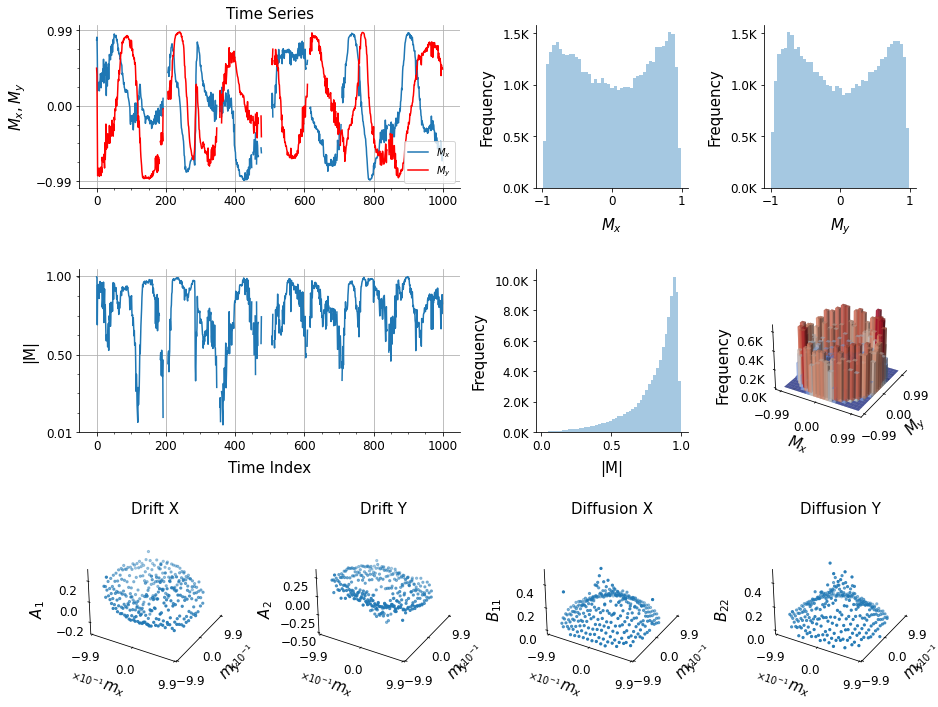

In [8]:
ddsde = pyddsde.Characterize(data, t=t)

## Show Time series

<IPython.core.display.Javascript object>

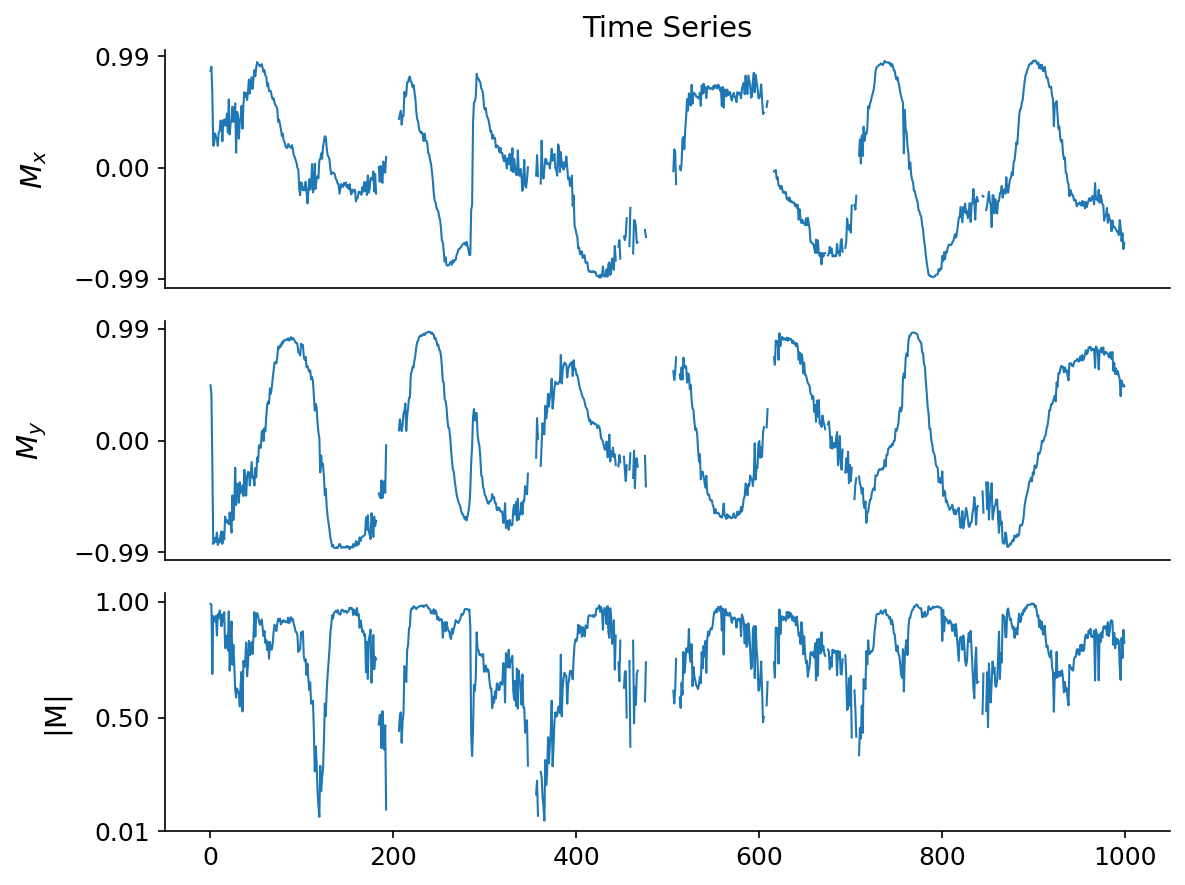

In [9]:
fig_timeseries = ddsde.timeseries()
fig_timeseries.show()

## Show Histograms

<IPython.core.display.Javascript object>

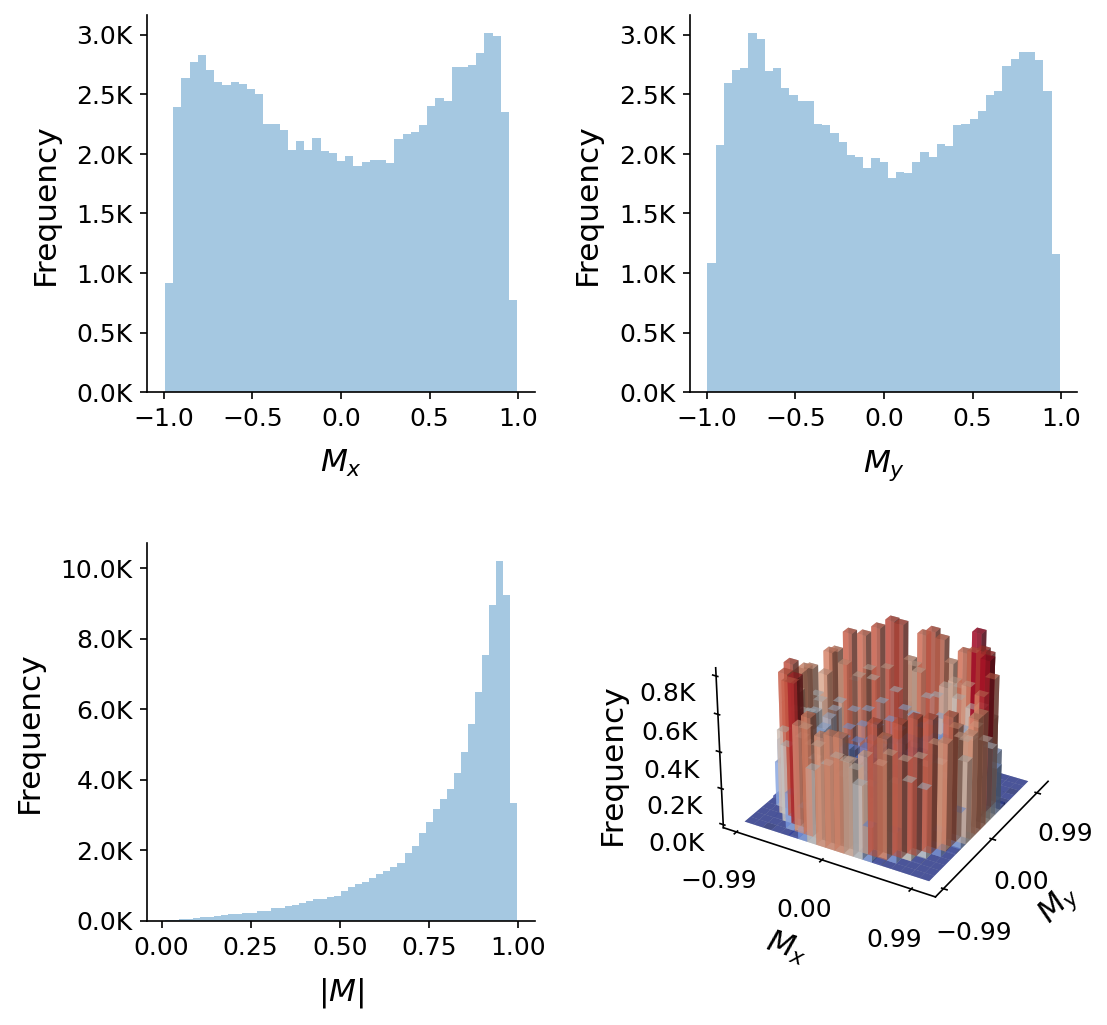

In [10]:
fig_histogram = ddsde.histogram()
fig_histogram.show()

## Drift slider
### Note:
    -- If the sliders are not being displayed below, then prehaps you need to configure your notebook
    -- refer: https://plotly.com/python/getting-started/

In [11]:
ddsde.drift()

<IPython.core.display.Javascript object>

In [12]:
ddsde.diffusion()

<IPython.core.display.Javascript object>

In [13]:
ddsde.diffusion_cross()

<IPython.core.display.Javascript object>

# Get plots for a time scale

<IPython.core.display.Javascript object>


23 not in list:
[1, 2, 4, 8, 11, 15, 18, 22, 26]
Choosing 22; (closest matching timescale from the avaiable ones)


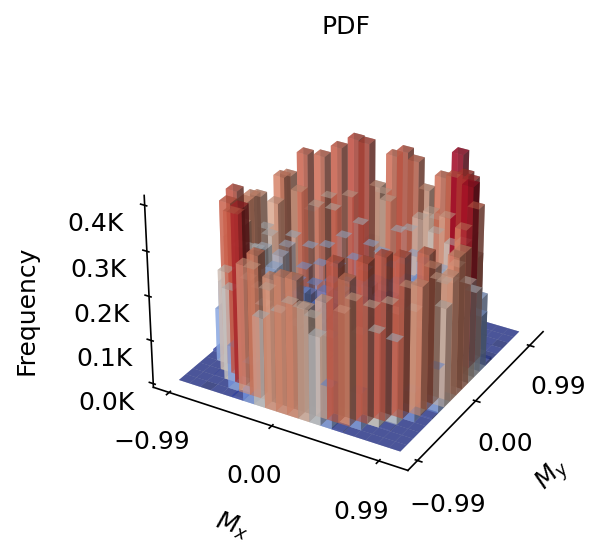

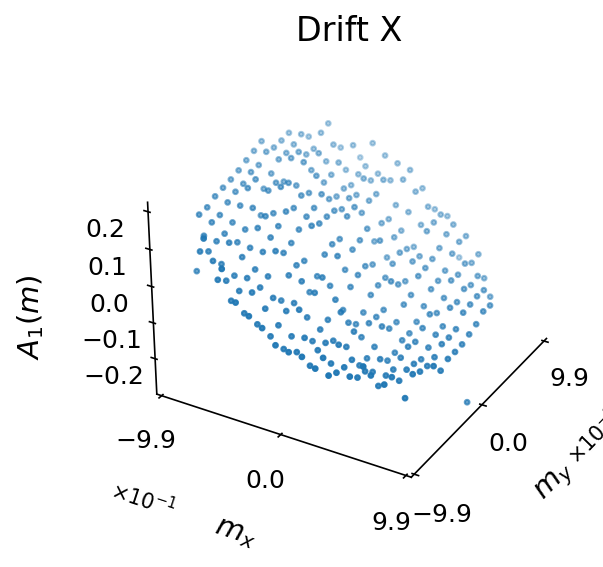

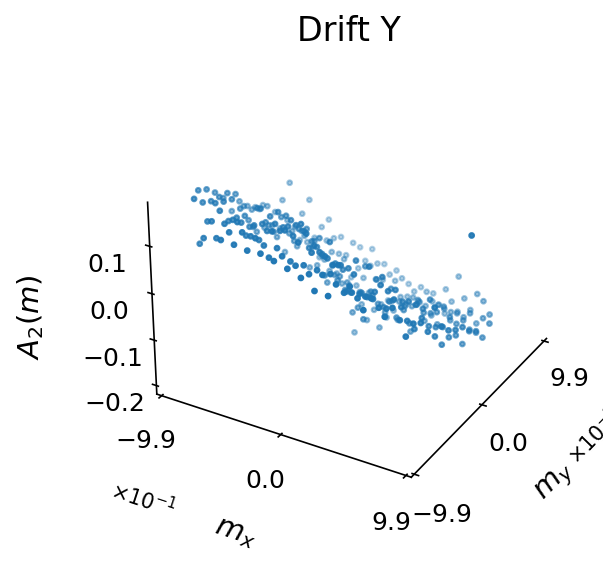

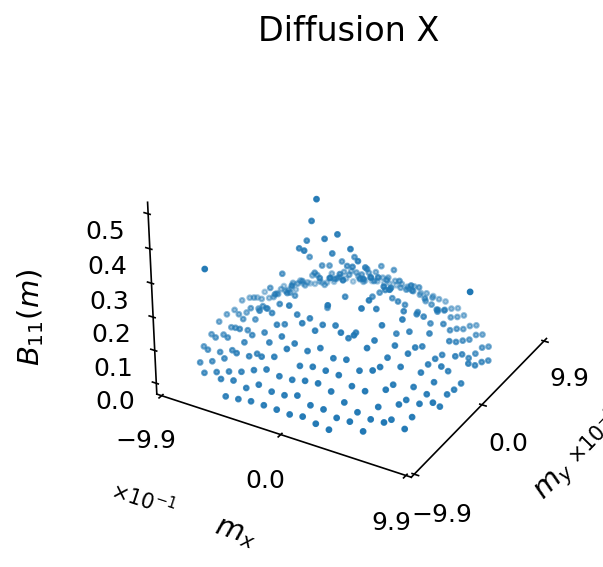

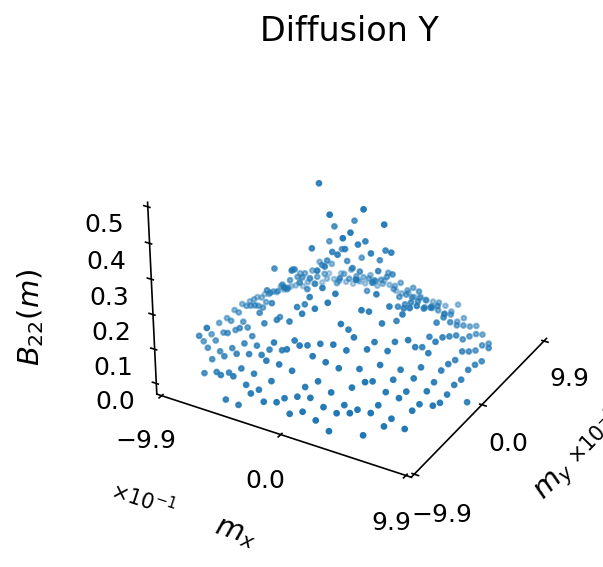

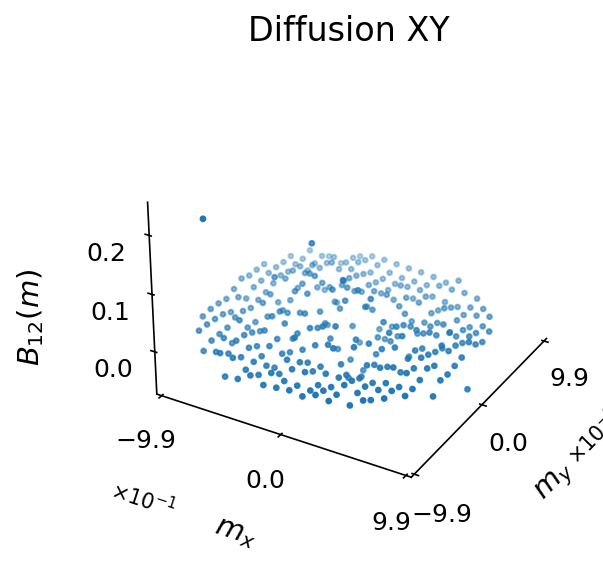

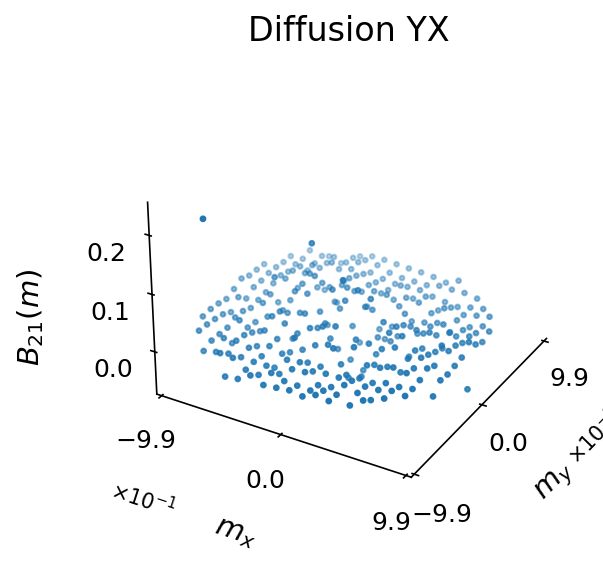

In [14]:
ddsde.visualize(drift_time_scale=23)

# Noise Characterstics Plots

<IPython.core.display.Javascript object>

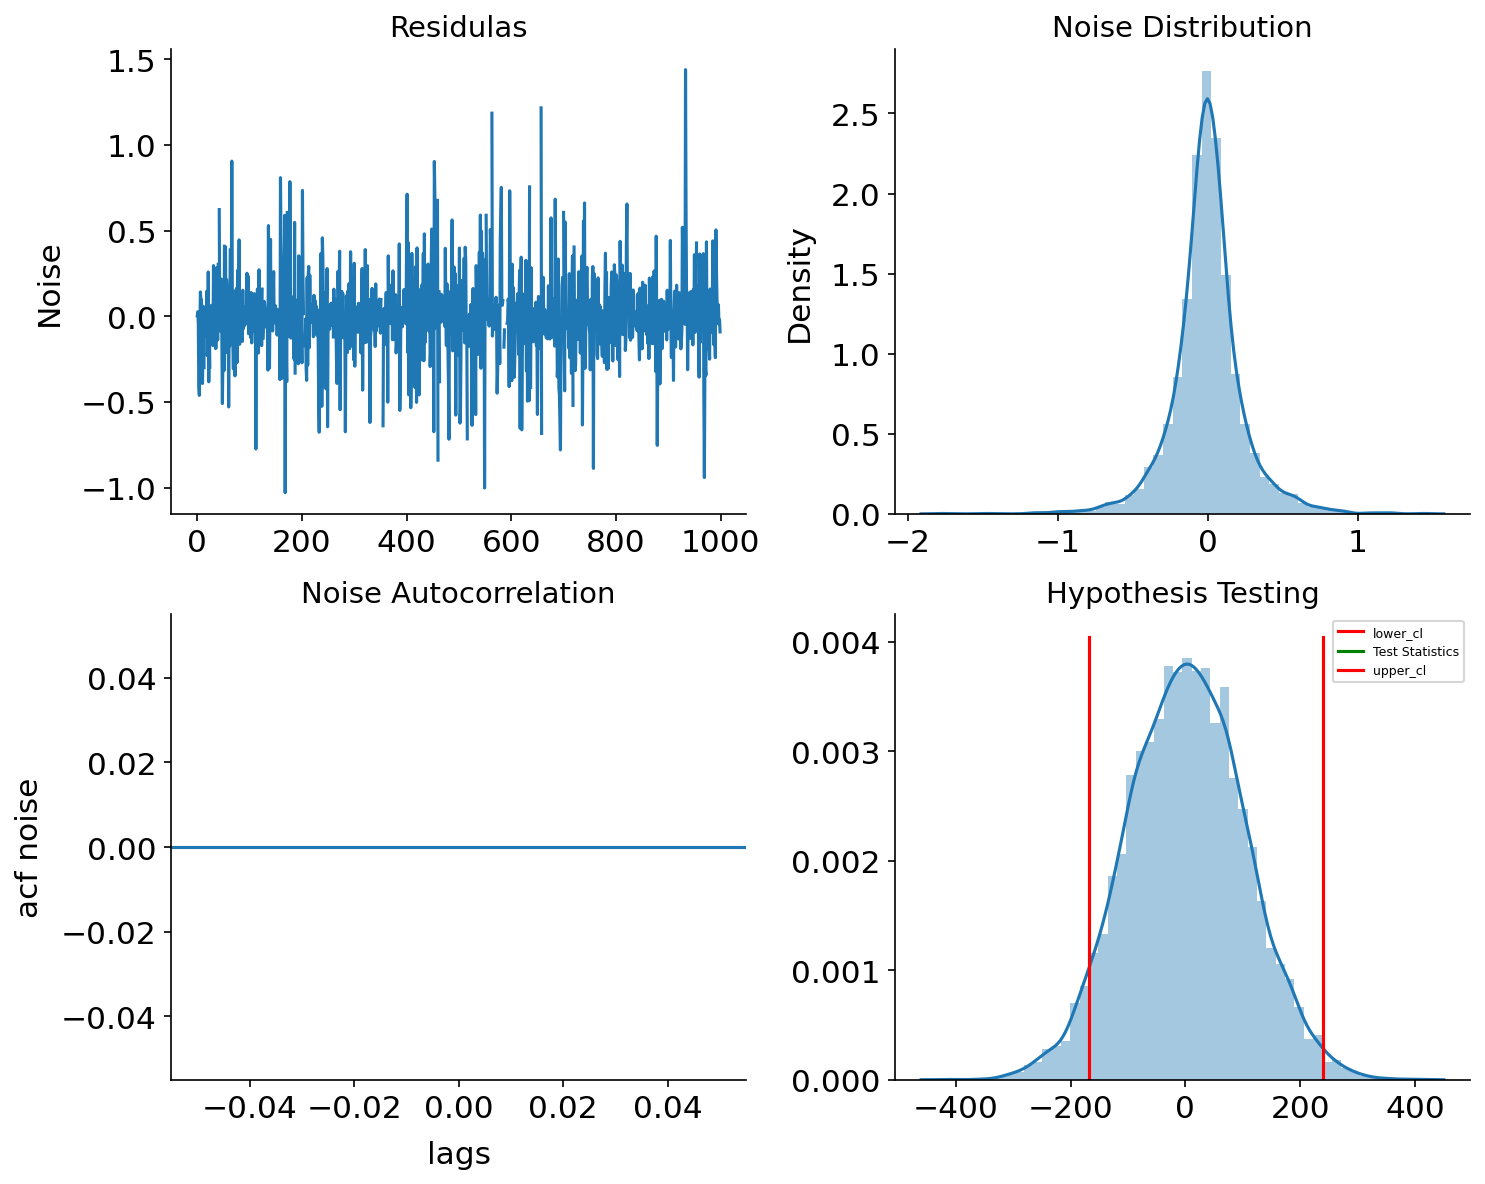

In [15]:
ddsde.noise_diagnostic()

In [28]:
len(ddsde._ddsde._noise)

<IPython.core.display.Javascript object>

4235

<IPython.core.display.Javascript object>

Exponential function of the form: 


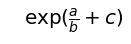

is fitted. `b` is the autocorrelation time and, `a`, `c` are the fitting parameters
acf_|M|^2 : a = 1.0106355661122826, b = 12.237954431304352, c = 0.03689105229961613
acf_M_x : a = 1.4073521297225198, b = 15.92249259854668, c = -0.01819939097575711
acf_My : a = 1.4093482024533945, b = 15.763942956505199, c = -0.018424292174050755


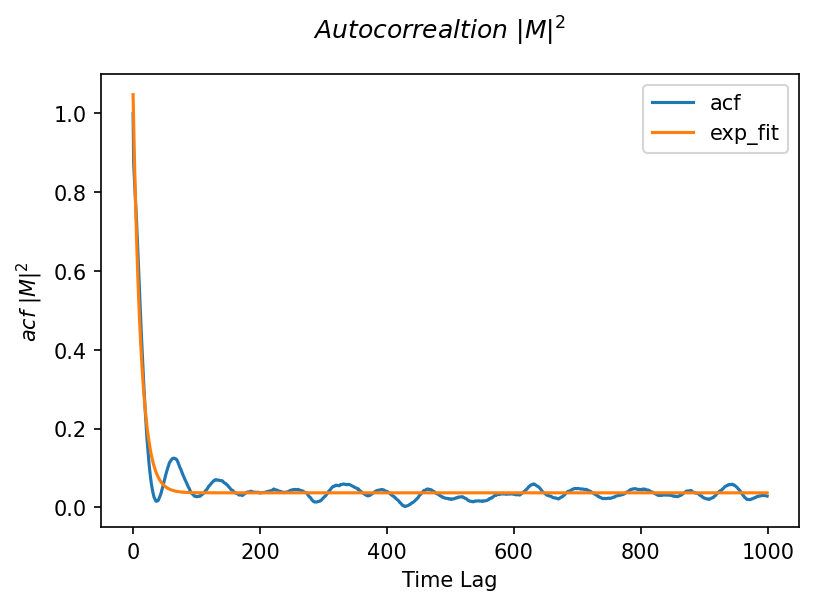

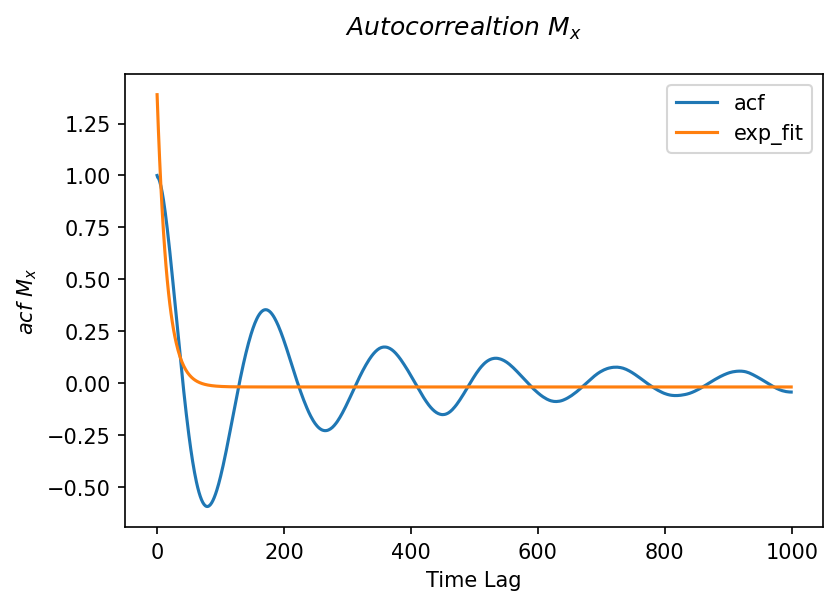

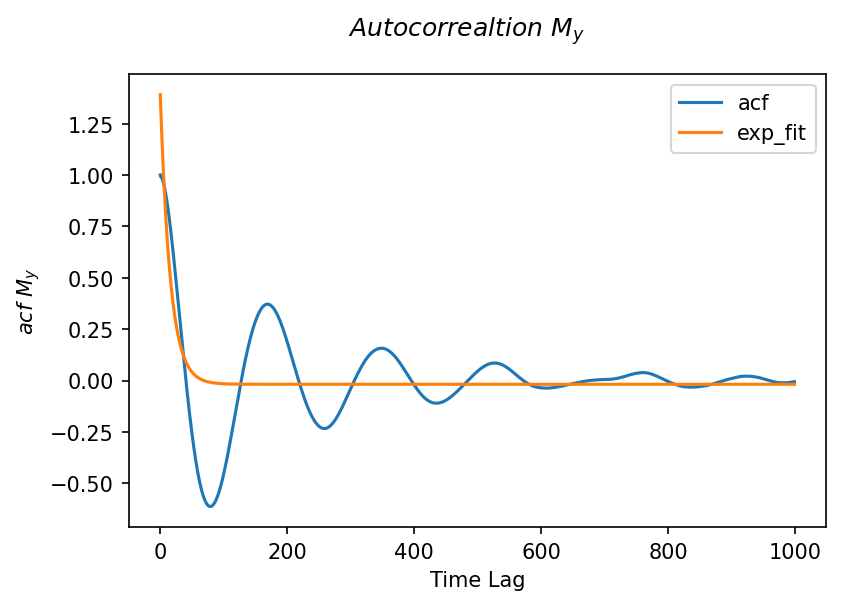

In [16]:
ddsde.acf_diagnostic()

<IPython.core.display.Javascript object>

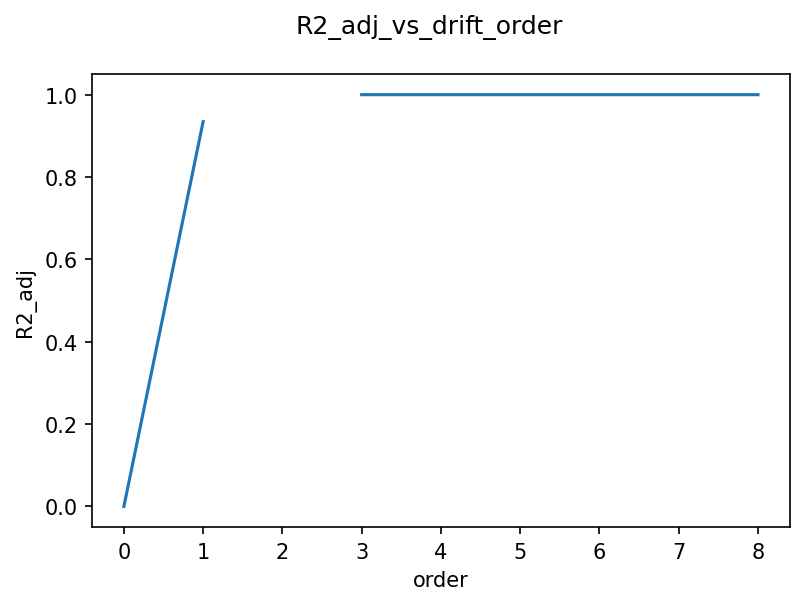

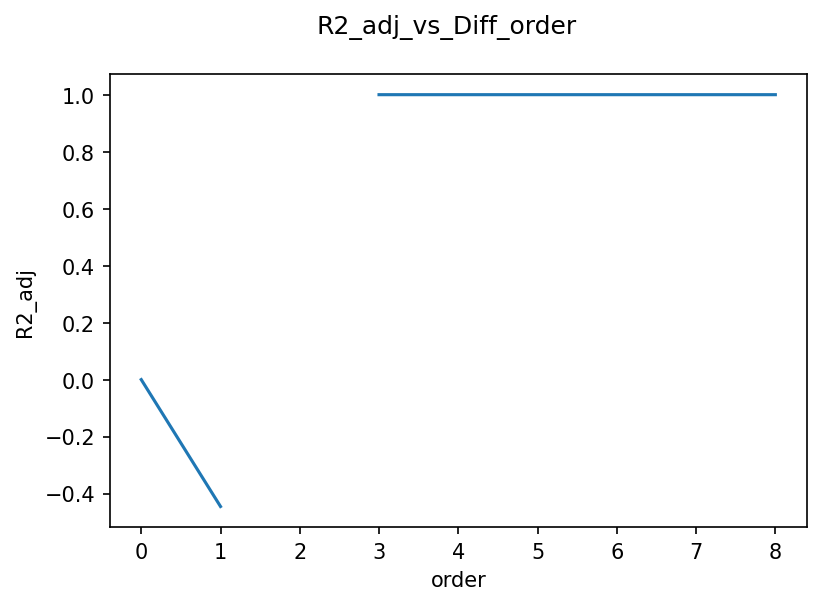

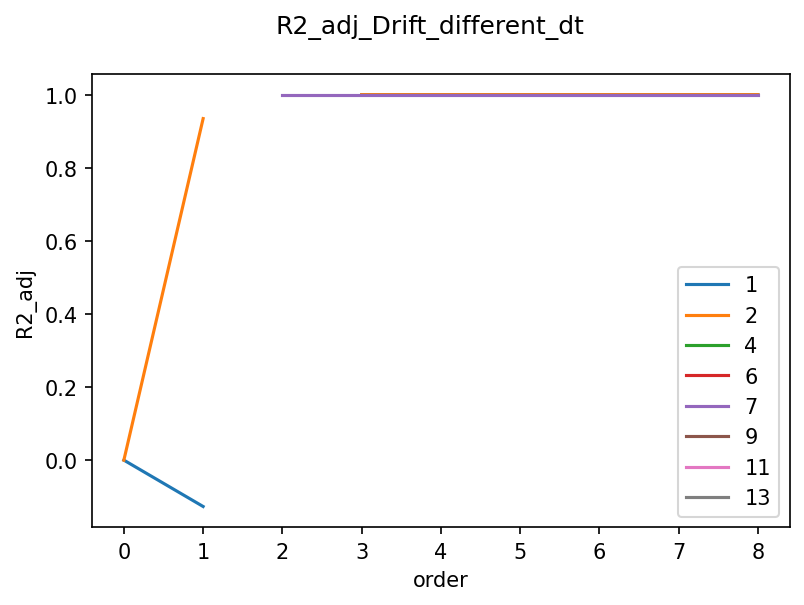

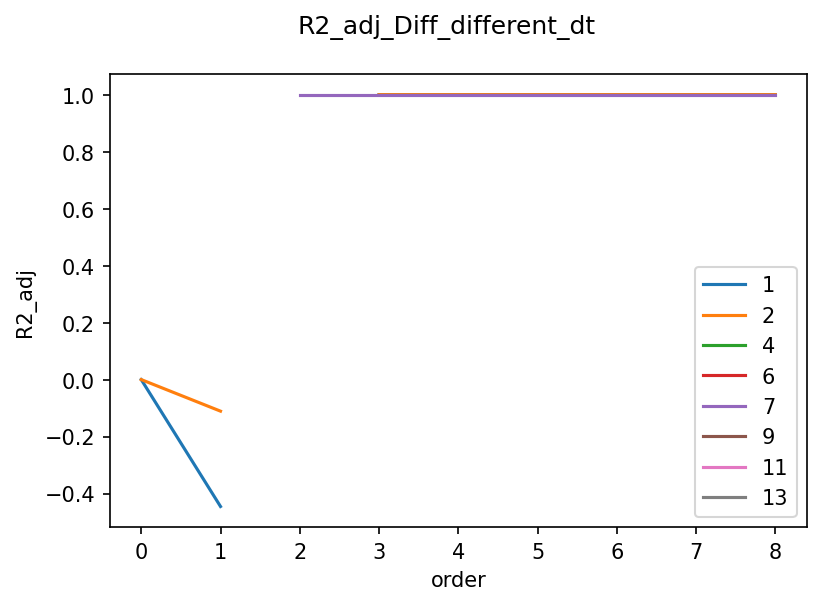

In [17]:
ddsde.fitting_diagnostic()

# Export Data

In [18]:
ddsde.export_data(save_mat=True, zip=True)

<IPython.core.display.Javascript object>

'Exported to /content/results/2021-04-06-06-19-12'

In [19]:
data, t = pyddsde.load_sample_dataset('fish-data-etroplus')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Missing values in time series


Generating Slider data: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


Note: All summary and plots are rounded to third decimal place.
Calculations, however, are accurate and account for missing values too.


| Mx range                       : (-0.999, 0.999)|
| Mx mean                        :      0.004     |
| My range                       :  (-0.998, 1.0) |
| My mean                        :     -0.002     |
| |M| range                      :   (0.0, 1.0)   |
| |M| mean                       :      0.815     |
| Autocorr time (Mx, My, |M|)    :  (36, 35, 22)  |
| (Dt, dt)                       :     (3, 1)     |



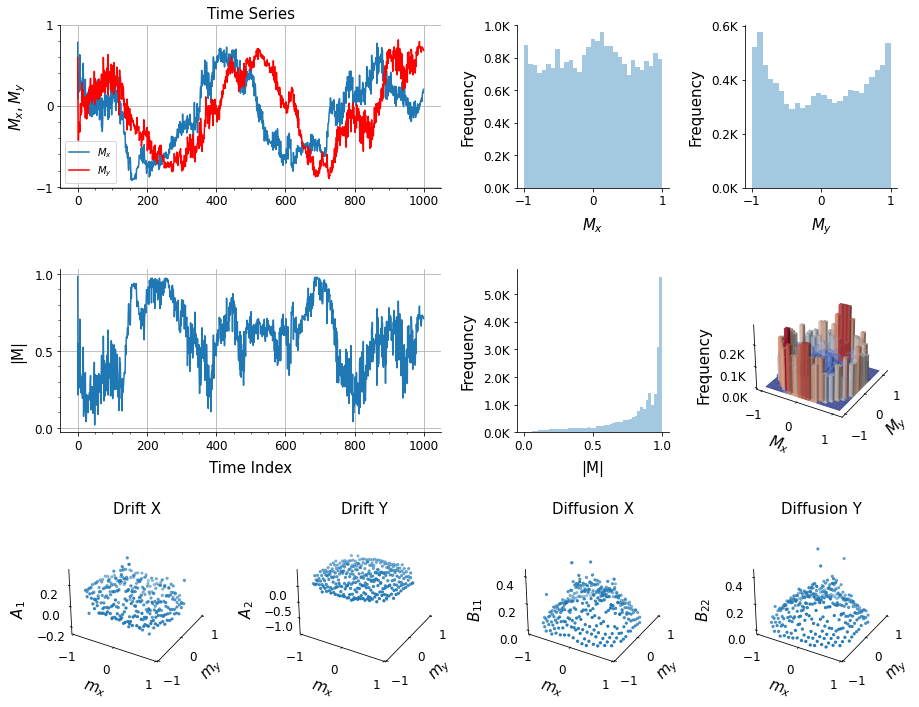

In [20]:
ddsde2 = pyddsde.Characterize(data, t)

<IPython.core.display.Javascript object>

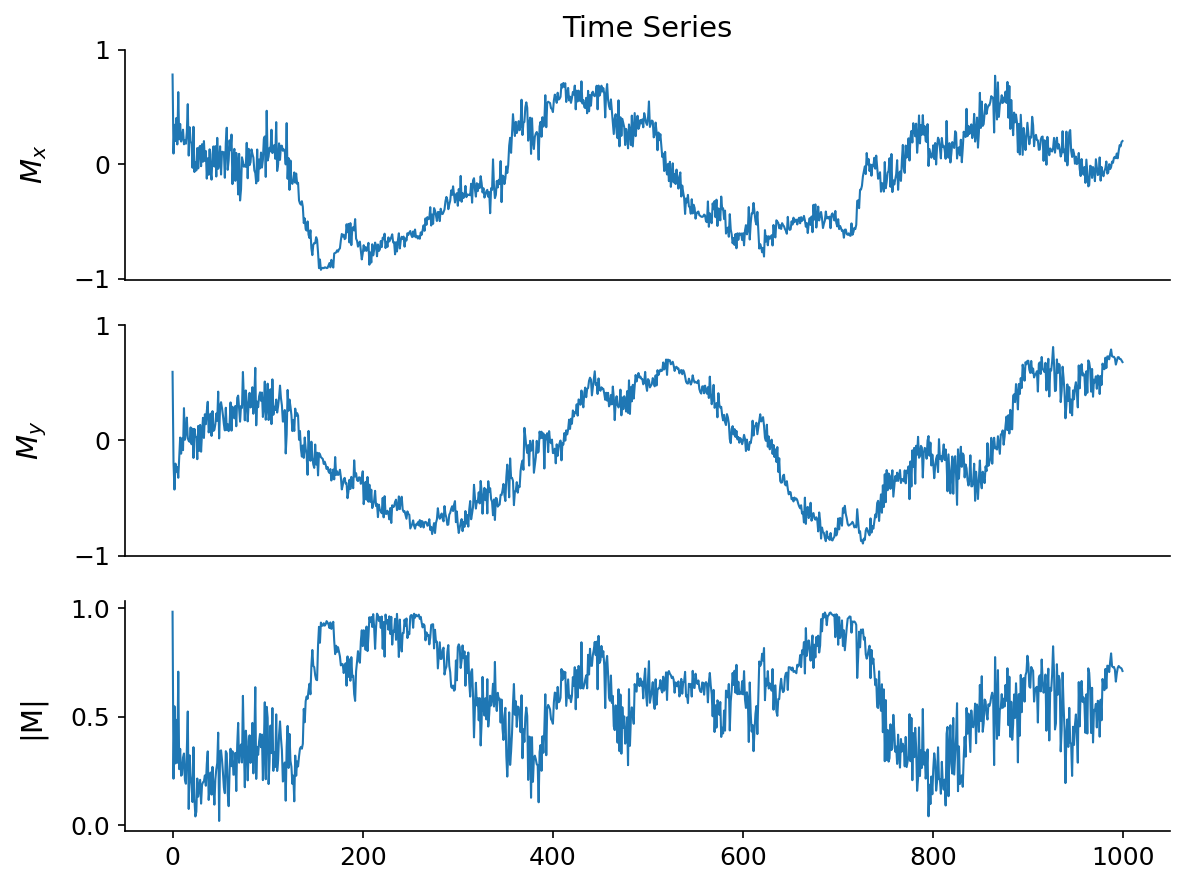

In [21]:
timesereis_figure = ddsde2.timeseries()

<IPython.core.display.Javascript object>

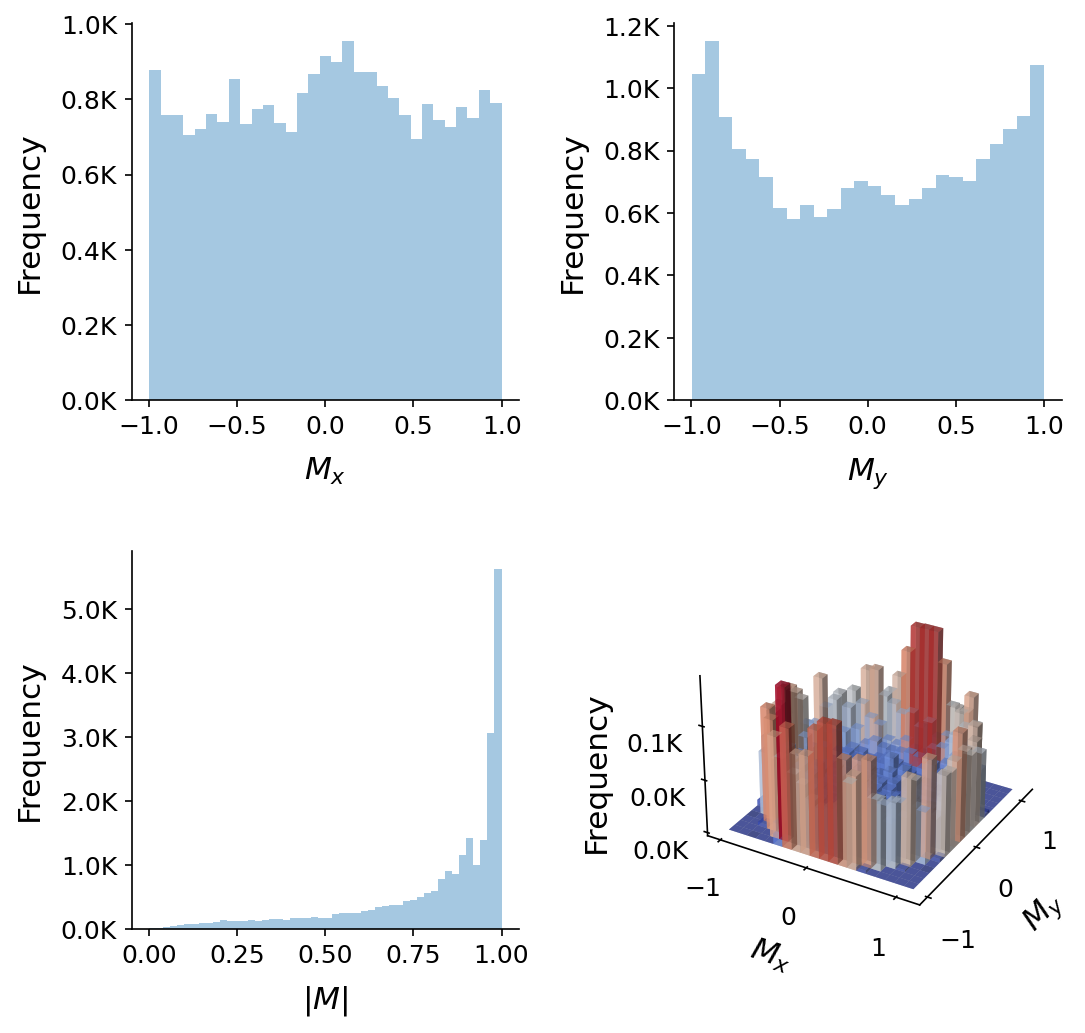

In [22]:
fhistogram_figure = ddsde2.histogram()

In [23]:
ddsde2.drift()

<IPython.core.display.Javascript object>

In [24]:
ddsde2.diffusion()

<IPython.core.display.Javascript object>

In [25]:
ddsde2.diffusion_cross()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

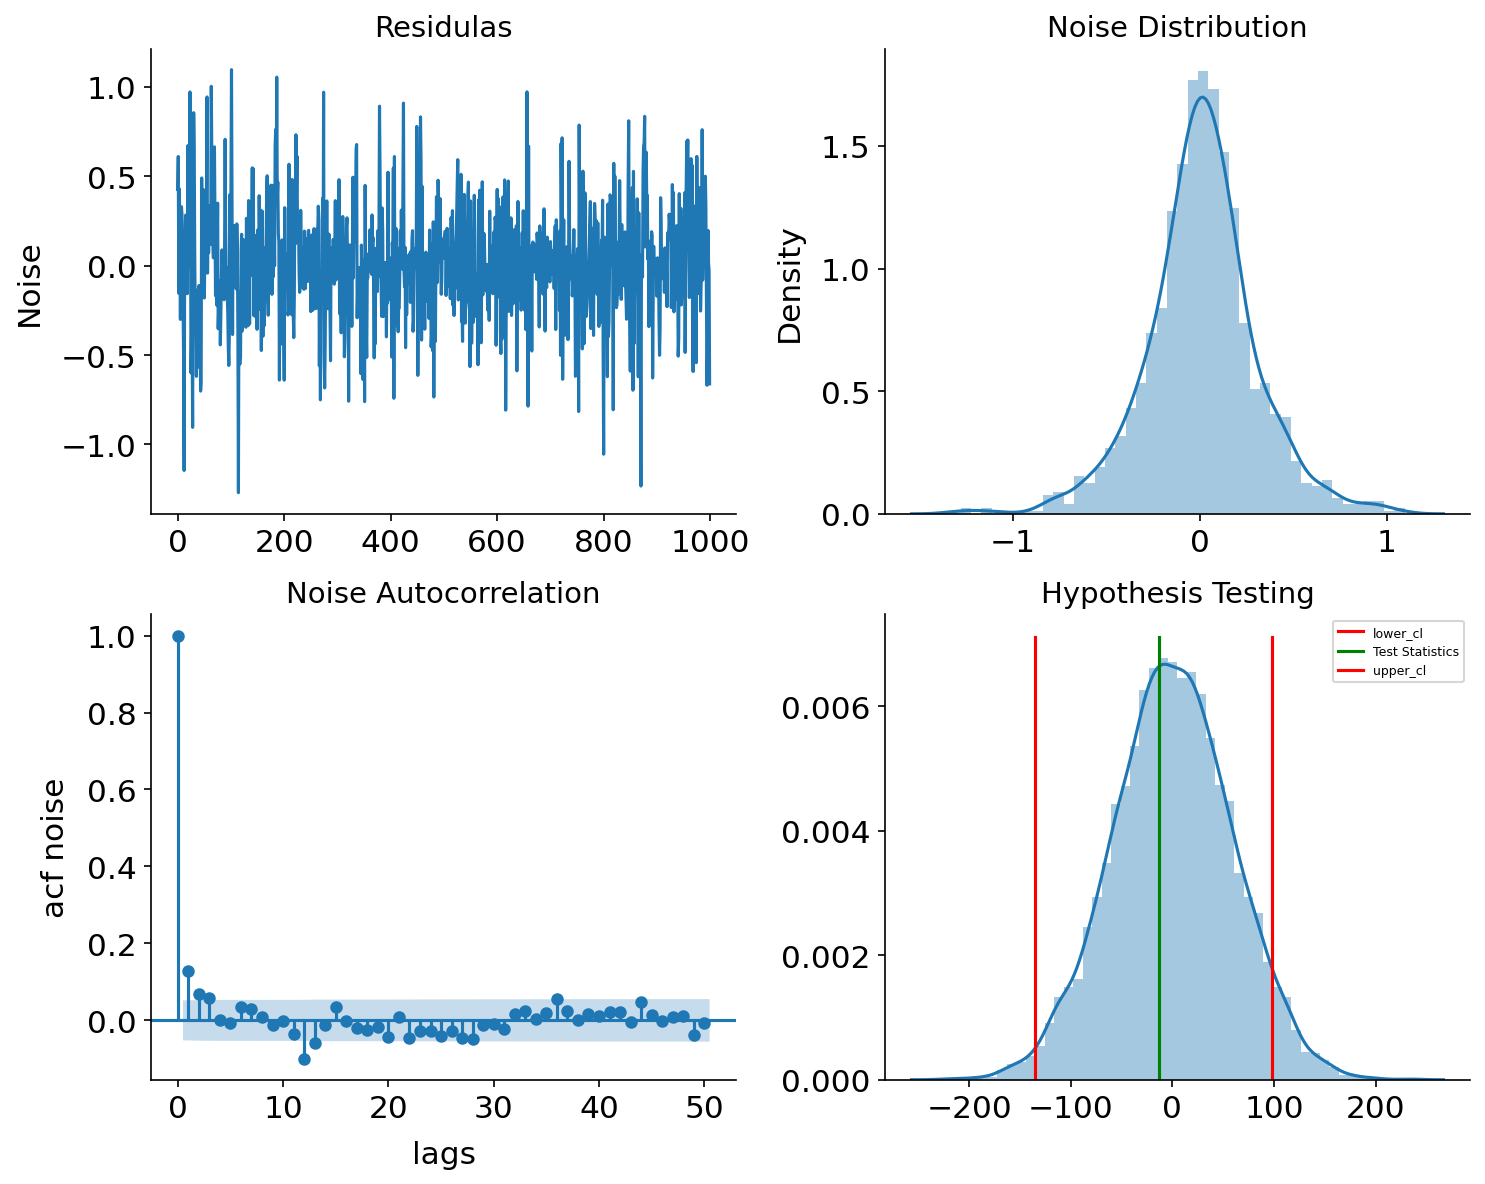

In [26]:
ddsde2.noise_diagnostic()